#Task 1


In [70]:
import tensorflow


In [71]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [72]:
!pip install openpyxl
import pandas as pd

# Load Excel file
df = pd.read_excel("/content/weather.xlsx")


In [76]:
selected_colums = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']
selected_data = df[selected_colums]

#Compute basic statistics
statistics = selected_data.describe().loc[['mean','50%','std']].rename(index={'50%': 'median'})

# Display the statistics
print("Basic Statistics for MinTemp, MaxTemp, Rainfall and Evaporaion:")
print(statistics)

Basic Statistics for MinTemp, MaxTemp, Rainfall and Evaporaion:
         MinTemp    MaxTemp  Rainfall  Evaporation
mean    7.319945  20.605817  1.411634     4.544044
median  7.500000  19.700000  0.000000     4.200000
std     6.014565   6.710911  4.206843     2.671469


In [63]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Dates'],
      dtype='object')

In [87]:
df.rename(columns={'Date': 'Dates'}, inplace=True)
df.insert(0, 'Dates', pd.date_range('2010-01-01', periods=361))

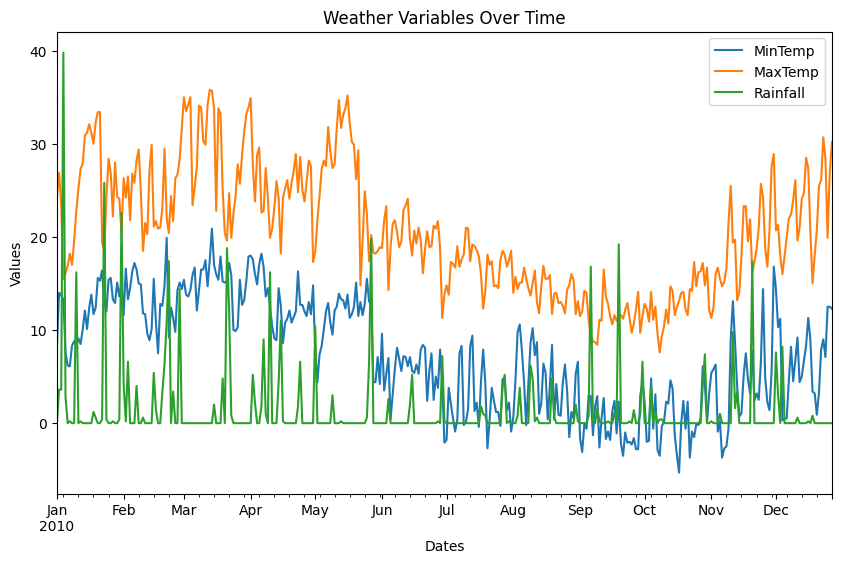

In [88]:
# Time Series Visualization
df.set_index('Dates', inplace=True)
df[['MinTemp', 'MaxTemp', 'Rainfall']].plot(figsize=(10, 6))
plt.title('Weather Variables Over Time')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.show()

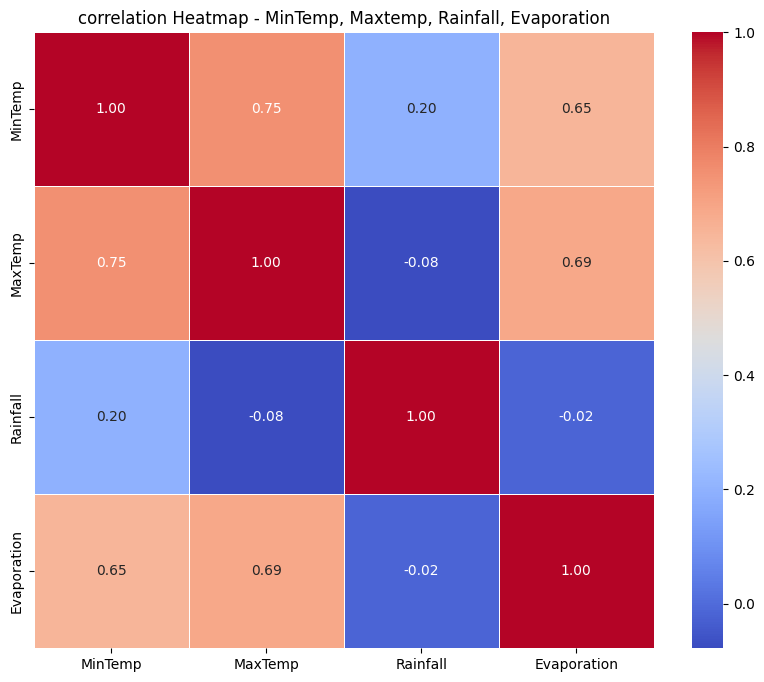

In [81]:
import seaborn as sns
selected_colums = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']
selected_data = df[selected_colums]

# calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=.5)
plt.title('correlation Heatmap - MinTemp, Maxtemp, Rainfall, Evaporation')
plt.show()

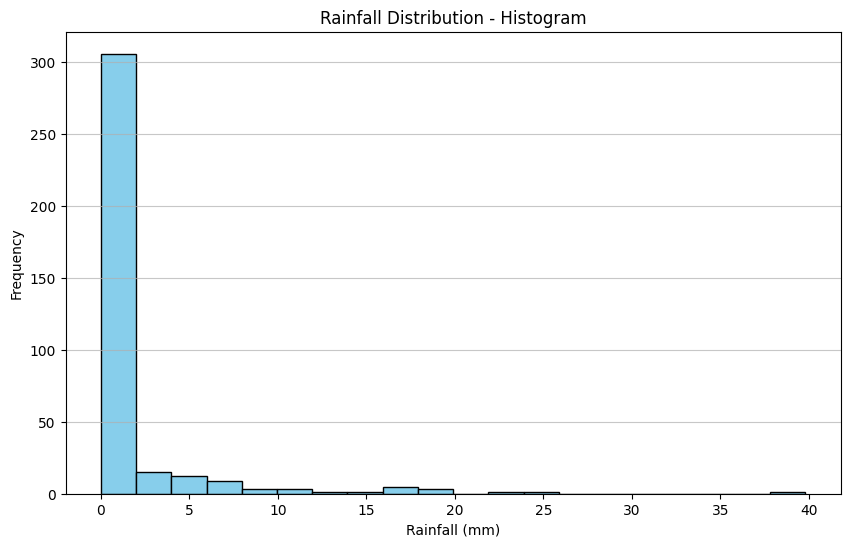

In [91]:
# Rainfall Distribution
plt.figure(figsize=(10, 6))
plt.hist(df["Rainfall"], bins=20, color='skyblue', edgecolor='black')
plt.title('Rainfall Distribution - Histogram')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

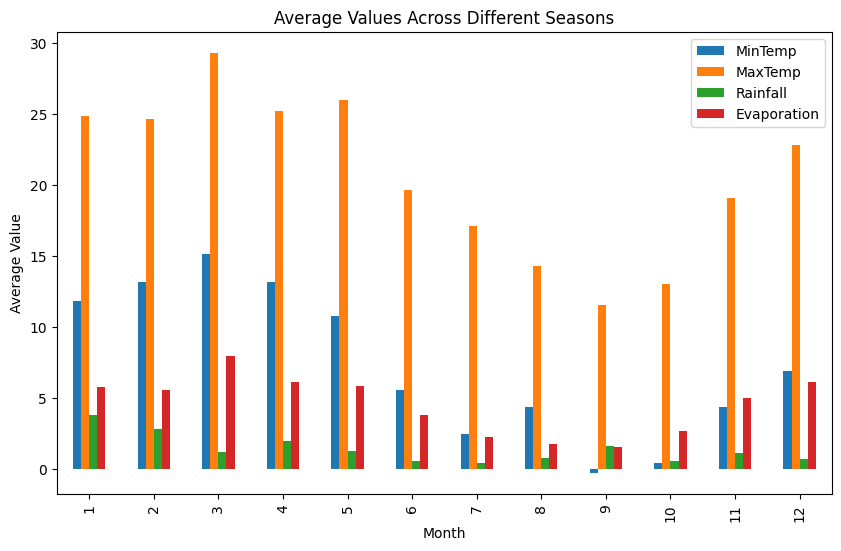

In [93]:
#Seasonal Analysis
# Assuming you have a 'Season' column
# You may need to create this column based on the date in your dataset
seasonal_avg = df.groupby(df.index.month)[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']].mean()
seasonal_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Values Across Different Seasons')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.show()